In [1]:
#list of text items, each item is one row of x matrix, text item whole lyrics or whole line, labels are 0 and 1 

In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
df_flefox =pd.read_csv('flefox.txt')

In [3]:
df_flefox['label'] = 0


In [4]:
df_cas = pd.read_csv('cig_after_s.txt')

In [5]:
df_cas['label'] = 2

In [6]:
#df_cas['title'].drop_duplicates()
#= df_cas.loc(['title'].unique())

In [62]:
#df_cas = df_cas.drop(labels=[9,10], axis=0)
#df_cas = df_cas.drop(labels=range(24, 42), axis=0)

In [63]:
df_cas

,Unnamed: 0,title,links,song_lyric,label
0,0,Don't Let Me Go,https://www.lyrics.com/lyric/36566939/Cigarett...,"When I was young, I thought the world of you\r...",2
1,1,Kiss It Off Me,https://www.lyrics.com/lyric/36566938/Cigarett...,Saw you on the side of the road\r\nI could see...,2
2,2,Heavenly,https://www.lyrics.com/lyric/36566937/Cigarett...,Wanting your love to come into me\r\nFeeling i...,2
3,3,You're the Only Good Thing in My Life,https://www.lyrics.com/lyric/36566936/Cigarett...,You only f*ck for love\r\nTold me you could ne...,2
4,4,Touch,https://www.lyrics.com/lyric/36566935/Cigarett...,"Oh, I missed you and I cried\r\nBut I said tha...",2
5,5,Hentai,https://www.lyrics.com/lyric/36566934/Cigarett...,There was a hentai video that I saw\r\nI told ...,2
6,6,Cry,https://www.lyrics.com/lyric/36566933/Cigarett...,It's making you cry every time\r\nYou give you...,2
7,7,Falling In Love,https://www.lyrics.com/lyric/36566932/Cigarett...,When I hold you close to me\r\nI could always ...,2
8,8,Pure,https://www.lyrics.com/lyric/36566931/Cigarett...,When you walk in the room\r\nIn a white bodysu...,2
11,11,Crush,https://www.lyrics.com/lyric/35132373/Cigarett...,I wanna line my walls with photographs you sen...,2


In [8]:
#finally clean !!
#df_cas   #.tail(40)

In [9]:
df_diiv=pd.read_csv('DIIV.txt')

In [10]:
df_diiv1=pd.read_csv('DIIV_1.txt')

In [11]:
data = [df_diiv, df_diiv1]
df_DIIV = pd.concat(data)

In [12]:
#for i in range(len(df_DIIV[:])):
    #df_DIIV['song_lyric'][i]=df_DIIV['song_lyric'][i].replace('\n',' ')

In [13]:
df_DIIV.reset_index()
#when you preprocess you can go into the links and use it in a programme (that uses a function

,index,Unnamed: 0,title,links,song_lyric
0,0,0,Horsehead,https://www.lyrics.com/lyric/36566183/DIIV/Hor...,I've seen the middle of\nFive foot airtight wa...
1,1,1,Like Before You Were Born,https://www.lyrics.com/lyric/36566182/DIIV/Lik...,The wind fans deadpan\nWe plummet through the ...
2,2,2,Skin Game,https://www.lyrics.com/lyric/36566181/DIIV/Ski...,One afterthought on a skin game\nI took it as ...
3,3,3,Between Tides,https://www.lyrics.com/lyric/36566180/DIIV/Bet...,"On and on, the clock was wrong\nYou've been nu..."
4,4,4,Taker,https://www.lyrics.com/lyric/36566179/DIIV/Taker,You watched my lips make\nThe promise I betray...
5,5,5,For the Guilty,https://www.lyrics.com/lyric/36566178/DIIV/For...,Love revenge\nLove redemption\nRise and fall\n...
6,6,6,Lorelei,https://www.lyrics.com/lyric/36566176/DIIV/Lor...,"Dog-star, ram, and pomegranate\nFox swam and s..."
7,7,7,Blankenship,https://www.lyrics.com/lyric/36566175/DIIV/Bla...,Armageddon is a product\nAnd one we choose to ...
8,8,8,Acheron,https://www.lyrics.com/lyric/36566174/DIIV/Ach...,This heart-pounding day has finally arrived\nA...
9,9,9,Out of Mind,https://www.lyrics.com/lyric/32524600/DIIV/Out...,Yeah out of sight\nAnd out of mind\nBut everyt...


In [14]:
df_DIIV['label'] =1

In [17]:
data1 = [df_DIIV, df_flefox, df_cas]
#df_all = pd.concat(data)

In [18]:
df_all = pd.concat(data1)
df_all

,Unnamed: 0,title,links,song_lyric,label
0,0,Horsehead,https://www.lyrics.com/lyric/36566183/DIIV/Hor...,I've seen the middle of\nFive foot airtight wa...,1
1,1,Like Before You Were Born,https://www.lyrics.com/lyric/36566182/DIIV/Lik...,The wind fans deadpan\nWe plummet through the ...,1
2,2,Skin Game,https://www.lyrics.com/lyric/36566181/DIIV/Ski...,One afterthought on a skin game\nI took it as ...,1
3,3,Between Tides,https://www.lyrics.com/lyric/36566180/DIIV/Bet...,"On and on, the clock was wrong\nYou've been nu...",1
4,4,Taker,https://www.lyrics.com/lyric/36566179/DIIV/Taker,You watched my lips make\nThe promise I betray...,1
...,...,...,...,...,...
73,73,I'm a Firefighter,https://www.lyrics.com/lyric/33635032/Cigarett...,"Baby, I'm a firefighter trapped in a burning h...",2
74,74,Don't Let Me Go,https://www.lyrics.com/lyric/36625068/Cigarett...,"When I was young, I thought the world of you\r...",2
75,75,Hentai,https://www.lyrics.com/lyric/36566943/Cigarett...,There was a hentai video that I saw\r\nI told ...,2
76,76,Truly,https://www.lyrics.com/lyric/35562257/Cigarett...,Sitting out smoking in the garden of the apart...,2


In [16]:
df_all.reset_index(inplace=True)

In [20]:
#like X
X = df_all['song_lyric']

#like y 
y = df_all['label']  

In [21]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y, stratify=y)

In [22]:
def Countvect_fit_transf(Xtrain, ytrain):
    vectorizer = TfidfVectorizer(stop_words='english',ngram_range=(1, 3), min_df=0.03, max_df=0.95) #also play with putting min and max
    X = vectorizer.fit_transform(Xtrain)
    X_cv= pd.DataFrame(X.todense(), columns=vectorizer.get_feature_names_out(),index = ytrain)
    return X_cv , vectorizer

def Countvect_transf(Xtest, ytest, self_vectorizer): 
    X = self_vectorizer.transform(Xtest)
    X_cv= pd.DataFrame(X.todense(), columns=self_vectorizer.get_feature_names(),index = ytest)
    return X_cv

#def Countvect_transf_input(inputX, self_vectorizer): 
    #X = self_vectorizer.transform([inputX])
   # X_cv= pd.DataFrame(X.todense(), columns=vectorizer.get_feature_names())
   # return X_cv

In [23]:
Xtrain_trans, self_vectorizer = Countvect_fit_transf(Xtrain, ytrain)
Xtrain_trans

,ain,air,alive,alright,ancient,angel,arms,attention,awake,away,...,wish,won,word,words,work,world,wouldn,wrong,yeah,young
label,,,,,,,,,,,,,,,,,,,,,
2,0.0,0.000000,0.000000,0.00000,0.0,0.0,0.093471,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.000000,0.00000,0.0,0.0,0.000000,0.000000,0.000000,0.059012,...,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.000000,0.00000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,0.0,0.000000,0.000000,0.00000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.000000,0.00000,0.0,0.0,0.000000,0.101190,0.000000,0.000000,...,0.10119,0.075082,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0.0,0.208055,0.000000,0.00000,0.0,0.0,0.000000,0.000000,0.000000,0.141246,...,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,0.0,0.000000,0.000000,0.00000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.071608,0.07609,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
#Xtrain_trans = pd.DataFrame(Xtrain_trans)  #.todense(), columns=vectorizer.get_feature_names_out(), index=labels)

In [25]:
Xtest_trans = Countvect_transf(Xtest, ytest,self_vectorizer)

C:\Users\alexp\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [27]:
Xtest_trans

,ain,air,alive,alright,ancient,angel,arms,attention,awake,away,...,wish,won,word,words,work,world,wouldn,wrong,yeah,young
label,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.000000,0.00000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.304628,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.0,0.000000,0.00000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0,0.0,0.000000,0.00000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0,0.0,0.000000,0.00000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.0,0.000000,0.00000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.0,0.000000,0.00000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.0,0.000000,0.00000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.0,0.000000,0.00000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,...,0.00000,0.000000,0.000000,0.139179,0.000000,0.000000,0.322936,0.000000,0.000000,0.000000
2,0.0,0.000000,0.00000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [28]:
#export test data as csv (for using in terminal with argparse)

#NOTE !!!! do we need to make a new train test split from out train data for these models to prevent leakage (since we are exporting and testing within this notebook)



In [57]:
#imports
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

In [ ]:
#MODELS: imbalanced & three input vars

In [31]:
#model rf 
from sklearn.ensemble import RandomForestClassifier

In [32]:
rf_clf1 = RandomForestClassifier(max_depth=7, n_estimators=50, random_state=21, class_weight='balanced') 
#max depth is how deeply the tree will go with nodes (since so many features try more than tried in other models)
#n_estimators is trees in the forest (each tree is starting with diff random bits of data??)

In [33]:
rf_clf1.fit(Xtrain_trans, ytrain)

RandomForestClassifier(class_weight='balanced', max_depth=7, n_estimators=50,
                       random_state=21)

In [34]:
ypred_rf1 = rf_clf1.predict(Xtest_trans)

In [41]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

#scoring_function(ytest, ypred_rf1, 'RandomForestClassifier') #overall good scores

In [42]:
# Creating  a confusion matrix,which compares the y_test and y_pred
cm = confusion_matrix(ytest, ypred_rf1)

In [45]:
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df = pd.DataFrame(cm,
                     index = ['Fleet Foxes','DIIV','Cigarettes after_S'], 
                     columns = ['Fleet Foxes','DIIV','Cigarettes after_S'])

In [60]:
rf_clf1.score(Xtest_trans, ytest)

0.8181818181818182

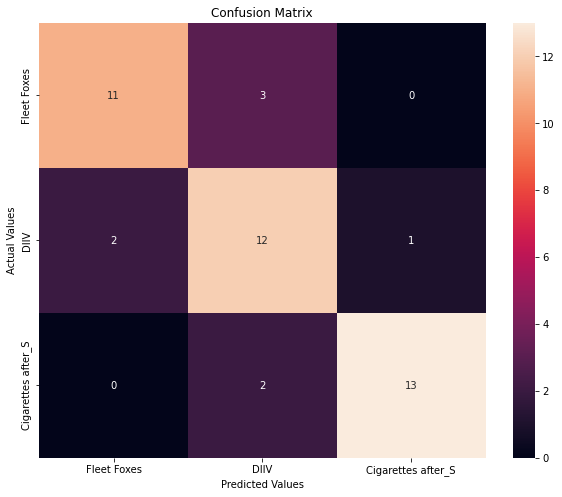

In [56]:
#Plotting the confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show() #least false with DIIV

In [48]:
#Multinomial NB 
from sklearn.naive_bayes import MultinomialNB

In [49]:
clf_NB2 = MultinomialNB()

In [50]:
clf_NB2.fit(Xtrain_trans, ytrain)

MultinomialNB()

In [51]:
ypred_NB2 = clf_NB2.predict(Xtest_trans)
ypred_NB2

array([2, 1, 0, 0, 1, 2, 2, 1, 2, 0, 1, 0, 0, 2, 1, 1, 0, 2, 1, 0, 0, 0,
       0, 0, 0, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 1, 0, 2, 1, 2, 0, 0],
      dtype=int64)

In [52]:
# Creating  a confusion matrix,which compares the y_test and y_pred
cm1 = confusion_matrix(ytest, ypred_NB2)

In [53]:
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df1 = pd.DataFrame(cm1,
                     index = ['Fleet Foxes','DIIV','Cigarettes after_S'], 
                     columns = ['Fleet Foxes','DIIV','Cigarettes after_S'])

In [59]:
clf_NB2.score(Xtest_trans, ytest)

0.8636363636363636

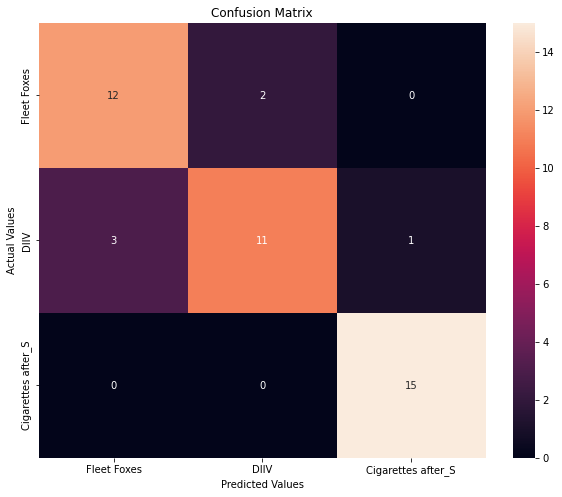

In [55]:
#Plotting the confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(cm_df1, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

In [ ]:
#cell below-> do I want to incorporate FE options as input?? can combine above input in function with pipeline below? 

In [ ]:
# pipeline for naive bayes wit vectorization 
naive_bayes_pipeline = Pipeline([
    ('bow_transformer', CountVectorizer(analyzer=split_into_lemmas, stop_words='english')),
    ('tf_idf', TfidfTransformer()),
    ('classifier', MultinomialNB())
])


In [ ]:
#pipeline for different classifiers -Q: diff metrics here for same type of classifiers poss 
clfs = []

clfs.append(DecisionTreeClassifier())
clfs.append(RandomForestClassifier())

In [134]:
#function to make a pipeline of different classifiers
for classifier in clfs:
    pipeline.set_params(clf = classifier)
    scores = cross_validate(pipeline, X_train_trans, y_train)
    scoring_function(ytest, ypred_rf1, clfs)
    print('---------------------------------')
    print(str(classifier))
    print('-----------------------------------')
    for key, values in scores.items():
            print(key,' mean ', values.mean())
            print(key,' std ', values.std())

In [ ]:
#for pickling output into a file to use in CLI
import pickle

with open ('my_estimator.pkl', 'wb') as my_file:
    pickle.dump(my_variable, my_file)
    
#go into script 
with open ('my_estimator', 'rb') as my_file:
    my_estimator = pickle.load(my_file)
    
my_estimator.predict_proba(X_test) #gives probability Xtest belongs to one class (class1)

In [ ]:
#reading a non pickle file type in CLI 
import argparse, pathlib

parser = argparse.ArgumentParser()
parser.add_argument('file', type=pathlib.Path)
args = parser.parse_args()

with args.file.open('r') as file:
    print(file.read())